In [31]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline


In [32]:
# Load .env enviroment variables
load_dotenv()


True

In [33]:
ALPACA_API_KEY = 'PKQQ7XS883AUMIT0OD60'
ALPACA_SECRET_KEY = 'Y4KCEPviOtFQURa6Z6tHoO7vRr9ma6dQbkZQMeQe'
# alpaca_api_key = os.getenv(ALPACA_API_KEY)
# alpaca_secret_key = os.getenv(ALPACA_SECRET_KEY)
alpaca_api_key = ALPACA_API_KEY
alpaca_secret_key = ALPACA_SECRET_KEY
# alpaca_api_key

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [34]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth=5.3


In [35]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [36]:
## Ftch current BTC price
btc_res = requests.get(btc_url).json()
# print(json.dumps(btc_res, indent=4))
btc_value = float(btc_res["data"]["1"]["quotes"]["CAD"]["price"])
my_btc_value = btc_value * my_btc
# Fetch current ETH price
eth_res =requests.get(eth_url).json()
#print(json.dumps(eth_res, indent=4))
eth_value = float(eth_res["data"]["1027"]["quotes"]["CAD"]["price"])
my_eth_value = eth_value * my_eth


# Compute current value of my crpto


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $21220.39
The current value of your 5.3 ETH is $2743.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# alpaca_api_key = os.getenv(ALPACA_API_KEY)
# alpaca_secret_key = os.getenv(ALPACA_SECRET_KEY)
# Create the Alpaca API object
# YOUR CODE HERE!
print(type(alpaca_api_key))

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

<class 'str'>


In [39]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [40]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [41]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [42]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = [
    my_spy_value + my_agg_value,
    my_btc_value + my_eth_value
]


df_savings = pd.DataFrame(savings, index=["Shares", "Crypto"], columns=["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Shares,40782.000000
Crypto,23964.283983


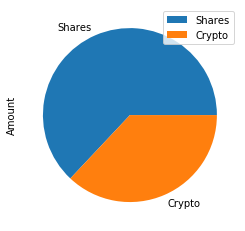

In [43]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount")

In [44]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total = float(df_savings.sum())

# Validate saving health


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG

stock= ["AGG","SPY"]
timeframe="1D"
stock_data= alpaca.get_barset(
stock,
timeframe,
start=start_date,
end=end_date
).df

In [47]:
# Display sample data
stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [48]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set number of simulations
num_sims = 500
# Configure a Monte Carlo simulation to forecast one year daily returns
MC_30years = MCSimulation(
    portfolio_data = stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [49]:
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003903,0.997401,1.011353,1.009721,1.004457,0.999702,1.007626,1.000345,0.999530,0.997082,...,0.994153,1.004182,1.011382,1.006071,0.999772,1.000764,1.002705,0.996806,1.011209,1.006291
2,1.002187,1.002587,1.012182,1.001040,1.008046,1.006843,1.012986,0.997140,0.997586,1.010479,...,0.991274,1.008789,1.011447,0.992098,1.002409,0.988516,1.007359,1.000108,1.023008,1.004151
3,1.006484,0.999160,1.014502,0.998624,1.013769,1.003051,1.019540,0.995679,0.998763,1.013132,...,0.999524,1.011933,1.012210,0.988075,1.003981,0.981826,1.006365,1.007688,1.016239,1.019045
4,1.012003,0.992393,1.016036,0.995928,1.011281,1.006230,1.021277,0.994074,1.001185,1.007855,...,1.006415,1.008215,1.015829,0.987900,0.999174,0.976278,1.019452,1.011491,1.017525,1.022619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.497020,5.278760,14.894156,7.024977,8.727935,3.680690,10.950952,5.509991,13.065496,7.705175,...,6.648774,18.579381,12.344252,11.471346,3.964333,5.415041,3.431771,6.552990,5.066333,6.631430
7557,5.446216,5.223329,14.777131,6.996175,8.689007,3.682335,10.979168,5.509296,13.030080,7.645192,...,6.606538,18.683083,12.434895,11.473960,3.981826,5.392815,3.413380,6.576537,5.100479,6.609650
7558,5.456991,5.273095,14.774725,6.996957,8.750118,3.668808,10.942372,5.455572,13.013401,7.700846,...,6.612246,18.912182,12.441939,11.609486,3.992747,5.399299,3.379294,6.543993,5.114407,6.646504
7559,5.430063,5.319300,14.707126,7.013402,8.744063,3.669489,11.035235,5.444834,13.044115,7.667008,...,6.672437,18.835940,12.471605,11.502221,3.987453,5.434128,3.361913,6.505702,5.151756,6.636507


In [50]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

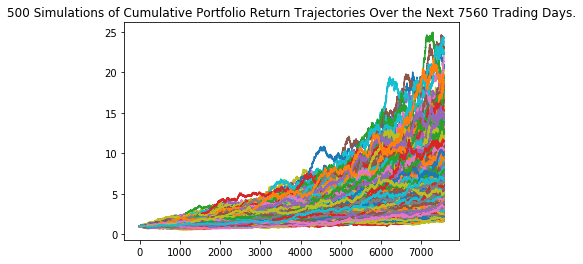

In [51]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()


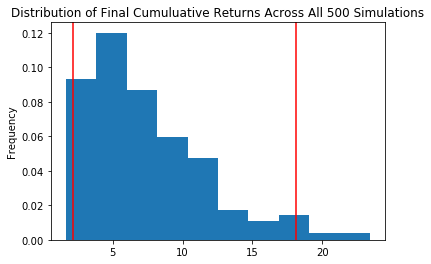

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()


### Retirement Analysis

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.340232
std               4.234022
min               1.626118
25%               4.136548
50%               6.185207
75%               9.351486
max              23.438108
95% CI Lower      2.134672
95% CI Upper     18.094042
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $42693.43 and $361880.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [59]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $42693.43 and $361880.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [67]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002001,1.003427,1.012684,1.000776,0.998144,1.004443,0.994319,1.002522,1.006628,1.005183,...,0.995177,1.005504,0.996389,1.003617,1.001697,0.998113,1.006373,1.001981,0.999296,1.001865
2,1.000373,1.002850,1.009583,1.000351,0.998667,0.996681,0.985253,1.000901,1.010153,1.002526,...,0.992561,1.004190,0.988140,1.004541,1.006474,0.995403,0.994432,1.003005,0.996835,1.005478
3,0.996835,1.008703,1.002183,1.003379,0.997326,1.001248,0.990982,0.999413,1.018245,0.999037,...,0.997055,1.003032,0.989756,1.000362,1.015152,0.991782,0.993603,1.003576,1.005714,1.003181
4,0.997802,1.012383,1.012932,0.996079,0.995607,1.002465,0.996426,0.994676,1.017925,0.991022,...,1.005251,1.016493,0.990657,1.000103,1.008965,0.988220,0.998148,0.996079,1.004338,1.007314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.247844,1.327427,1.549938,2.254178,1.218667,0.766799,1.156219,0.977305,1.026886,1.993880,...,0.930186,1.115321,1.348368,1.412159,1.307907,1.036041,1.297377,1.357455,1.549470,1.267672
1257,1.245314,1.336455,1.547051,2.283328,1.209784,0.760557,1.152013,0.979259,1.027987,1.994729,...,0.936639,1.123174,1.345356,1.413370,1.304177,1.038676,1.298279,1.345054,1.551871,1.271810
1258,1.238540,1.333126,1.547921,2.272496,1.217542,0.764193,1.155303,0.988002,1.023139,1.978456,...,0.933419,1.126357,1.347032,1.403195,1.312040,1.037034,1.287129,1.335018,1.552995,1.270892
1259,1.235194,1.342046,1.548932,2.267628,1.214802,0.767101,1.160215,0.982304,1.019050,1.973872,...,0.932343,1.122030,1.350556,1.404574,1.319604,1.043144,1.293845,1.332167,1.553380,1.265681


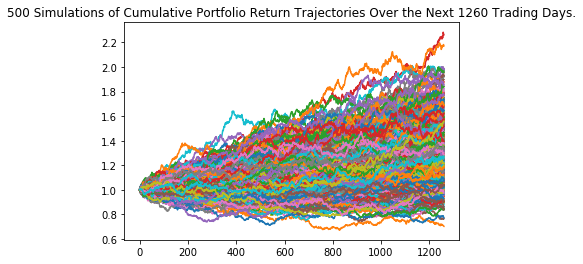

In [69]:
# Plot simulation outcomes
line_plot = MC_5years.plot_simulation()

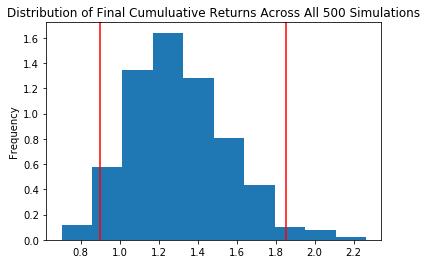

In [70]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5years.plot_distribution()

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.303885
std               0.249787
min               0.702452
25%               1.117549
50%               1.284556
75%               1.451676
max               2.262594
95% CI Lower      0.899330
95% CI Upper      1.851536
Name: 1260, dtype: float64


### Ten Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [75]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002291,1.002960,0.989406,0.998368,1.005291,0.998545,0.999957,0.998431,0.996495,0.995871,...,1.006820,1.009515,0.993151,0.993686,1.007855,1.002696,1.007609,1.004742,0.994242,0.986963
2,1.003754,1.005552,0.990807,1.006914,1.003403,1.002032,0.998609,1.000657,0.991264,1.003392,...,1.007474,1.005667,0.994967,0.991223,1.008047,1.002089,0.998615,1.003048,0.997741,0.989940
3,1.005050,1.015893,0.993980,1.006920,0.993492,1.006299,1.013354,1.002167,0.997135,1.010454,...,1.005869,1.009227,0.988018,0.994135,1.006818,0.994700,1.005141,1.001035,1.001151,0.986845
4,1.005236,1.018016,0.996395,1.009772,0.994800,1.013211,1.020944,1.000358,0.990436,1.016074,...,0.998362,1.023023,0.993949,0.993329,1.003229,0.984753,1.009008,1.008156,1.006300,0.989056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.628461,2.222809,2.130102,2.142246,1.859779,1.681868,2.080215,1.438138,1.212988,1.284120,...,1.583988,1.694044,1.419257,1.880439,2.219255,1.270528,2.470680,1.448733,1.963979,1.547996
2517,1.633501,2.233066,2.140443,2.162808,1.861242,1.696345,2.087986,1.426812,1.207886,1.274596,...,1.587732,1.689857,1.420970,1.878789,2.208565,1.271178,2.462272,1.466044,1.991500,1.552844
2518,1.620402,2.216877,2.130945,2.162426,1.854340,1.703872,2.090301,1.420583,1.207462,1.280684,...,1.590618,1.703529,1.424696,1.879080,2.205498,1.265654,2.467492,1.464253,1.992003,1.562262
2519,1.617910,2.227094,2.110621,2.162518,1.863613,1.707666,2.095315,1.421670,1.207604,1.286185,...,1.606720,1.695930,1.424245,1.883033,2.193649,1.267670,2.479634,1.463370,2.005798,1.571153


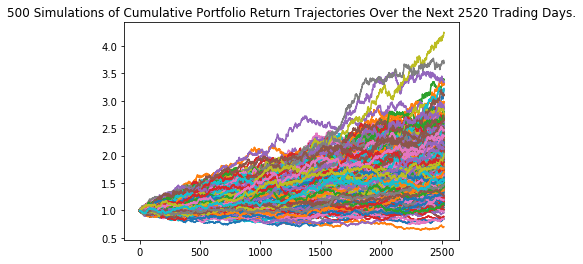

In [76]:
# Plot simulation outcomes
line_plot = MC_10years.plot_simulation()

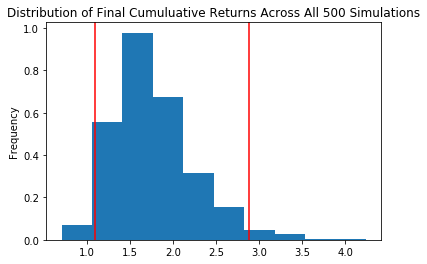

In [77]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10years.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.303885
std               0.249787
min               0.702452
25%               1.117549
50%               1.284556
75%               1.451676
max               2.262594
95% CI Lower      0.899330
95% CI Upper      1.851536
Name: 1260, dtype: float64


In [80]:
# Set initial investment
initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $53959.8 and $111092.19
